# Segmentación de Clientes con Redes Neuronales

## 1. Análisis Exploratorio de los Datos (EDA)

### 1.1 Carga de Librerías

In [67]:
# Cargamos las librerías a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Para mostar las cifras en formato float
pd.options.display.float_format = '{:.2f}'.format

### 1.2 Carga de Datos

In [68]:
# Asignamos los datos a un dataframe
clientes = pd.read_csv('.\..\data\customers.csv')

# Mostramos el encabezado de los datos
clientes.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.00,Low,1.00,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.00,Average,4.00,Cat_6
2,458996,Female,Yes,69,No,NaN,0.00,Low,1.00,Cat_6
3,459000,Male,Yes,59,No,Executive,11.00,High,2.00,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.00,Cat_6


In [69]:
# Mostramos el número de filas, columnas, valores NO nulos y el tipo de datos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


### 1.3 Estadística Descriptiva

In [70]:
# Resumimos las variables numéricas
clientes.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,2627.00,463433.92,2618.25,458989.00,461162.50,463379.00,465696.00,467968.00
Age,2627.00,43.65,16.97,18.00,30.00,41.00,53.00,89.00
Work_Experience,2358.00,2.55,3.34,0.00,0.00,1.00,4.00,14.00
Family_Size,2514.00,2.83,1.55,1.00,2.00,2.00,4.00,9.00


### 1.4 Visualización de Variables Numéricas

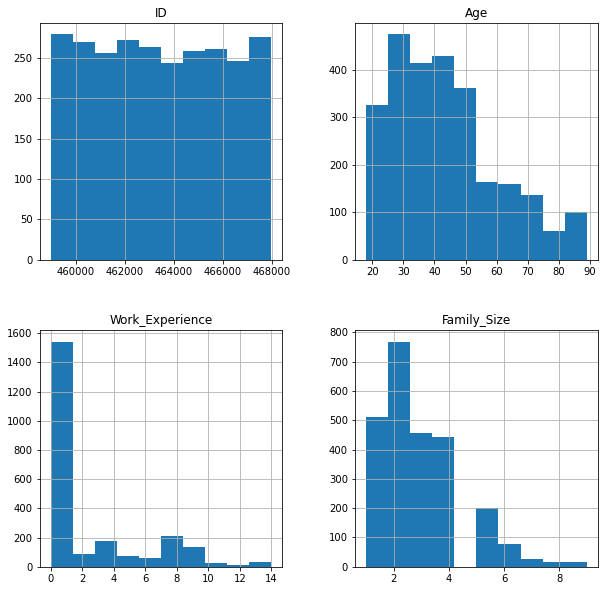

In [35]:
# Trazamos los histogramas
clientes.hist(bins=10 , figsize=(10,10)) 
plt.show()

## 2. Preparación de los Datos

### 2.1 Limpieza de Datos

In [71]:
# Eliminamos la variable ID

clientes = clientes.drop(['ID'], axis = 1)
clientes.shape

(2627, 9)

In [72]:
# Mostramos la suma de valores nulos de cada variable

clientes.isnull().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [73]:
# Imputamos los valores nulos

from sklearn.impute import KNNImputer

imputer = KNNImputer()

### 2.2 Codificación de Datos Categóricos

In [74]:
# Ordenamos las variables categóricas ordinales y nominales

Gender = ['Male', 'Female']
Ever_Married = ['Yes', 'No']
Graduated = ['No', 'Yes']
Profession = ['Engineer', 'Healthcare', 'Executive', 'Marketing', 'Doctor', 'Artist', 'Lawyer', 'Entertainment', 'Homemaker']
Spending_Score = ['Low', 'Average', 'High']
Var_1 = ['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7']

In [75]:
# Asignamos las categorías

categorias = [Gender,
              Ever_Married,
              Graduated,
              Profession,
              Spending_Score,
              Var_1]

In [76]:
# Asignamos las columnas categóricas

categorical = ['Gender',
               'Ever_Married',
               'Graduated',
               'Profession',
               'Spending_Score',
               'Var_1']

In [77]:
# Aplicamos el codificador OrdinalEncoder a las variables categóricas ordinales y nominales

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = categorias,
                    handle_unknown='use_encoded_value', unknown_value=-1)

### 2.3 Escalamiento de Variables

### 2.4 Sesgo / Asimetría

In [78]:
# Asignamos las columnas categóricas

numerical = ['Age',
             'Work_Experience',
             'Family_Size']

In [79]:
# Aplicamos la transformación de Box-Cox o Yeo-Johnson a los atributos con sesgo
# box-cox (valores positivos)
# yeo-johnson (valores negativos)

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)

### 2.5 Transformación de Columnas

In [80]:
# Creamos Pipelines Auxiliares

from sklearn.pipeline import make_pipeline

categorical_pipeline = make_pipeline(oe, imputer) #scaler
numerical_pipeline = make_pipeline(pt, imputer) #scaler

In [81]:
# Aplicamos el transformador de columnas make_column_transformer

from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (numerical_pipeline, numerical),
    (categorical_pipeline, categorical),
     remainder = 'passthrough')

In [82]:
# Ajustamos y transformamos los datos

clientes = ct.fit_transform(clientes)
clientes

array([[-0.31481914, -1.19342187, -1.49190138, ...,  0.        ,
         0.        ,  5.        ],
       [-0.24491788,  1.42980985,  0.88839264, ...,  1.        ,
         1.        ,  5.        ],
       [ 1.37898776, -1.19342187, -1.49190138, ..., -1.        ,
         0.        ,  5.        ],
       ...,
       [ 0.68383385, -0.57884173, -0.39849791, ...,  7.        ,
         0.        ,  5.        ],
       [ 0.37093251, -0.066179  ,  1.32453349, ...,  2.        ,
         2.        ,  3.        ],
       [ 0.14081622,  1.50064602,  0.33824854, ...,  1.        ,
         0.        ,  6.        ]])

### 2.6 División de los Datos

In [83]:
# Dividimos los datos en X y y
X = clientes[:,0:8]
y = clientes[:,8]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (2627, 8)
y: (2627,)


In [84]:
# Dividimos los datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0, stratify=y) #,stratify=y

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (2101, 8)
X_test: (526, 8)
y_train: (2101,)
y_test: (526,)


In [85]:
# Codificamos las variables de salida

from keras.utils import np_utils

y_train_ohe = np_utils.to_categorical(y_train, num_classes=7)
y_test_ohe = np_utils.to_categorical(y_test, num_classes=7)

## 3. Modelado

### 3.1 Secuencial

In [86]:
# Definimos el modelo de capas con Keras relu - softmax (clasificación multiclase)

#pip install tensorflow
#pip install keras

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Creamos 2 capas ocultas con 4 y 2 neuronas

model = Sequential()
model.add(Dense(16, input_dim=8,  activation='relu')) # 1 capa oculta
model.add(Dense(14, activation='relu')) # 2 capa oculta
model.add(Dense(7, activation='softmax')) # 1 capa de salida

In [87]:
# Compilamos el modelo Keras categorical_crossentropy (clasificación multiclase)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy']) #metrics=[tf.keras.metrics.Recall()])

In [88]:
# Ajustamos el modelo Keras en los datos de entrenamiento y validamos con los datos de prueba

model.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs=100, batch_size=10, verbose=True) #validation_split=0.3

Epoch 1/100
211/211 [==============================] - 1s 3ms/step - loss: 1.4611 - Accuracy: 0.5098 - val_loss: 1.2185 - val_Accuracy: 0.6388
Epoch 2/100
211/211 [==============================] - 0s 2ms/step - loss: 1.1934 - Accuracy: 0.6416 - val_loss: 1.1754 - val_Accuracy: 0.6407
Epoch 3/100
211/211 [==============================] - 0s 2ms/step - loss: 1.1671 - Accuracy: 0.6406 - val_loss: 1.1607 - val_Accuracy: 0.6445
Epoch 4/100
211/211 [==============================] - 0s 2ms/step - loss: 1.1491 - Accuracy: 0.6430 - val_loss: 1.1550 - val_Accuracy: 0.6464
Epoch 5/100
211/211 [==============================] - 0s 2ms/step - loss: 1.1389 - Accuracy: 0.6445 - val_loss: 1.1409 - val_Accuracy: 0.6483
Epoch 6/100
211/211 [==============================] - 0s 2ms/step - loss: 1.1337 - Accuracy: 0.6459 - val_loss: 1.1390 - val_Accuracy: 0.6483
Epoch 7/100
211/211 [==============================] - 0s 2ms/step - loss: 1.1266 - Accuracy: 0.6459 - val_loss: 1.1366 - val_Accuracy: 0.6483

In [89]:
# Evaluamos el modelo Keras de los estimadores

_, Accuracy = model.evaluate(X_train, y_train_ohe)
print('Accuracy: %.2f' % (Accuracy*100))

66/66 [==============================] - 0s 1ms/step - loss: 1.0361 - Accuracy: 0.6559
Accuracy: 65.59


In [90]:
# Hacemos predicciones sobre los datos de prueba

#y_pred = model.predict(X_test).round()

y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

17/17 [==============================] - 0s 2ms/step


array([2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 5,
       5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 2, 5,
       5, 5, 5, 5, 2, 5, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

### 3.2 Evaluación del modelo

In [91]:
# Obtenemos el reporte de clasificación de los predictores

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         6
         0.0       0.00      0.00      0.00         7
         1.0       0.00      0.00      0.00        28
         2.0       0.00      0.00      0.00        54
         3.0       0.42      0.18      0.25        77
         4.0       0.00      0.00      0.00         6
         5.0       0.66      0.96      0.78       335
         6.0       0.00      0.00      0.00        13

    accuracy                           0.64       526
   macro avg       0.14      0.14      0.13       526
weighted avg       0.48      0.64      0.54       526



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# Obtenemos la matriz de confusión de los predictores

from sklearn.metrics import multilabel_confusion_matrix

matrix = multilabel_confusion_matrix(y_test, y_pred)
print(matrix)

[[[520   0]
  [  6   0]]

 [[519   0]
  [  7   0]]

 [[498   0]
  [ 28   0]]

 [[467   5]
  [ 54   0]]

 [[430  19]
  [ 63  14]]

 [[520   0]
  [  6   0]]

 [[ 26 165]
  [ 12 323]]

 [[513   0]
  [ 13   0]]]


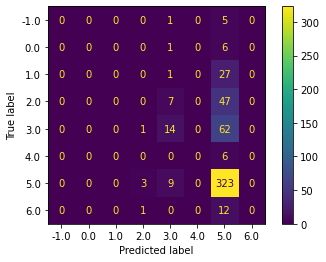

In [93]:
# Dibujamos la matriz de confusión de los predictores

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()